## Project 8
## VideoGamesSales
Assignment: "A Python notebook that describes the analysis and tells the reader the story of these videogames with the use of interactive Matplotlib plots".

Data: http://www.dei.unipd.it/~silvello/FIS2020/Video_games.zip

In [4]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.animation as animation
from IPython.display import HTML

In [5]:
df = pd.read_csv('vgsales.csv')  
#df.info()

In [6]:
df.head() # the videogames are already ordered from the most sold to the less sold

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### DATA PREPARATION

In the following lines, we clean and organize the dataset.

In [7]:
# 58 games without a "Publisher"
# Here are their publisher, found on Wikipedia
missing_publishers = ["Yuke's Future Media Creators",
             "Electronic Arts", 
             "Activision", 
             "Sony Computer Entertainment", 
             "Majesco Entertainment", 
             "THQ", 
             "THQ",
             "Sega",
             "Majesco Entertainment",
             "Majesco Entertainment",
             "Bandai Nmaco Entertainment",
             "Majesco Entertainment",
             "Nintendo",
             "Majesco Entertainment",
             "Majesco Entertainment",
             "Majesco Entertainment",
             "Majesco Entertainment",
             "Majesco Entertainment",
             "Nintendo",
             "Majesco Entertainment",
             "Majesco Entertainment",
             "Majesco Entertainment",
             "Majesco Entertainment",
             "Majesco Entertainment",
             "SouthPeak Games",
             "Majesco Entertainment",
             "The Pokemon Company",
             "Majesco Entertainment",
             "Focus Home Interactive",
             "Bandai Nmaco Entertainment",
             "Majesco Entertainment",  
             "Konami",
             "Hasbro",
             "Majesco Entertainment",
             "Nintendo",
             "Nippon Ichi Software",
             "Capocom",
             "Microsoft Game Studios",
             "Hudson Soft",
             "Wargaming.net",
             "Nintendo",
             "GameMill Entertainment",
             "Excalibur Publishing",
             "Alchemist",
             "GameMill Entertainment",
             "Nintendo",
             "Majesco Entertainment",
             "Giants Software",
             "Rejet",
             "Zoo Entertainment",
             "Sierra Entertainment",
             "Bandai Nmaco Entertainment",
             "Majesco Entertainment",
             "Ubisoft",
             "Sony",
             "GameMill Entertainment",
             "Excalibur Publishing",
             "Focus Home Interactive"] 


# 271 games without "Year"
# Here there are the year of the 23 most sold videogames(more than 1 million of global sales) wihout year, found on Wikipedia 
missing_years_23 = [2004, 2004, 2008, 2006, 1980, 2007, 2001,
         2008, 2006, 2007, 2010, 2007, 1980, 2011, 2008, 1980, 1980, 2003, 
         2002, 2007, 1999, 1997, 2011]

index_y = [ list(df.index)[i] for i in range( len( list( df[df['Global_Sales']>=0.99].index ) ))  if df[df['Global_Sales']>=0.99]['Year'].isnull()[i] ]

series_y = pd.Series(missing_years_23, index=index_y)

index_p = [list(df.index)[i] for i in range(len(list(df.index))) if df['Publisher'].isnull()[i]]

series_p = pd.Series(missing_publishers, index=index_p)

df.fillna(value = {'Year': series_y, 'Publisher': series_p }, inplace=True)

# We drop the other games without 'Year'
df.dropna(inplace=True)

# Change type of Year to int
df = df.astype({"Year":  int})

# Drop 3 games published after 2016
df.drop(list(df[df['Year']>2016].index), inplace=True)

# We checked if there are any duplicates in the dataset
# df.duplicated().any()

In [8]:
#df.info()

*Note*: at the beginning of our project we assigned to the (271-23=)248 videgames without 'Year' that are less influent, i.e. with less than 1 million Global Sales, a random year of publication.  <br>
Later we realized that doing it some graphs became incorrect.  <br>
So we preferred to drop these videgames. <br>
Here is the initial code.

In [10]:
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1.3)

### DATASET ANALYSIS

In our project we have analyzed the videogames' sales of the dataset focusing on: <br>
1. **platform**: <br>
    (a) top 10 videogames of all time  <br>
    (b) top platform over time <br>
    (c) videogame market trend <br>
2. **genre**: <br>
    (a) the genre of game with the highest sales <br>
    (b) top 3 games for each genre <br>
    (c) sales through countries by genre <br>
3. **publisher**:  <br>
    (a) general information about the publisher <br>
    (b) relation publisher-place

N.B. Every time we refer to something as "the best" we mean "the most sold/the most selling"

### 1. ANALYSIS OVER PLATFORM

#### <i>1a. TOP 10 VIDEOGAMES OF ALL TIME </i>

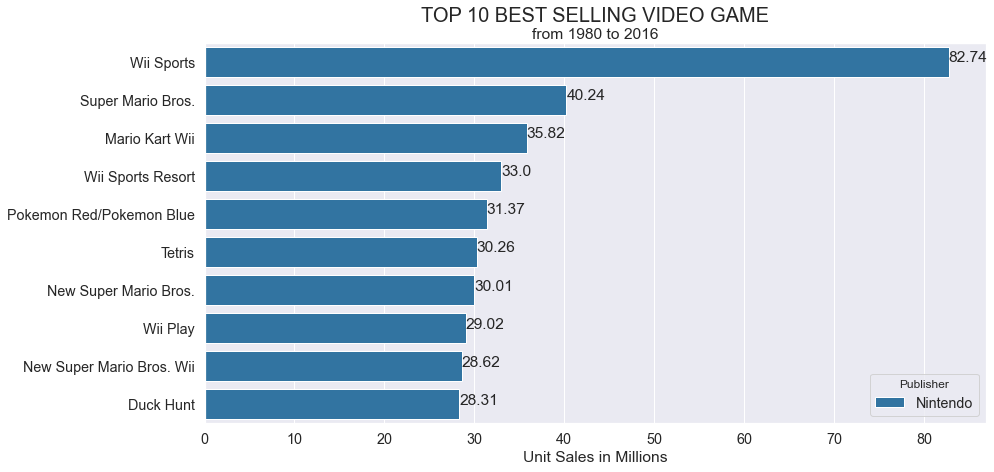

,Name,Platform,Publisher
0,Wii Sports,Wii,Nintendo
1,Super Mario Bros.,NES,Nintendo
2,Mario Kart Wii,Wii,Nintendo
3,Wii Sports Resort,Wii,Nintendo
4,Pokemon Red/Pokemon Blue,GB,Nintendo
5,Tetris,GB,Nintendo
6,New Super Mario Bros.,DS,Nintendo
7,Wii Play,Wii,Nintendo
8,New Super Mario Bros. Wii,Wii,Nintendo


In [11]:
f, ax = plt.subplots(figsize=(14,7))

g=sns.barplot(x='Global_Sales', y='Name', hue='Publisher', data=df.loc[:9]) 
g.set( ylabel='', xlabel='Unit Sales in Millions')
g.set_title('TOP 10 BEST SELLING VIDEO GAME', size=20)

for (y,x) in enumerate(df.loc[:9,'Global_Sales']):
    g.text(x,y, x, ha="left")
    
secax = ax.secondary_xaxis('top')
secax.set_xlabel('from 1980 to 2016')
secax.set_xticks([])

plt.show()

df[['Name', 'Platform', 'Publisher']].head(9)

They are all videogames of Nintendo's Platforms .

  #### <i>1b. TOP 10 PLATFORMS OVER TIME</i>

We have seen how platforms evolve from 1980 to 2016, arriving at an interesting conclusion.

In [12]:
df1=df[['Platform', 'Year', 'Global_Sales']]
Platform=pd.unique(df1.Platform)
Year=np.sort(pd.unique(df1.Year))
plattt=[]
yearrr=[]
saless=[]
for platform in Platform:
    sales=[]
    plat=df[df1.Platform==platform]
    for year in Year:
        plattt.append(platform)
        yearrr.append(year)
        sales.append(plat[plat.Year==year].Global_Sales.sum()) 
    for i in range(1,len(sales)+1):
        saless.append(sum(sales[:i]))
df2=pd.DataFrame({'Platform': plattt, 'Year':yearrr, 'Sales':saless})

In [13]:
def top_of_year(year, n=6):
    return df2[df2['Year']==year].sort_values(by='Sales', ascending=False).head(n)

def bar_chart_race(year):
    df3 = top_of_year(year)
    ax.clear()
    g=sns.barplot(x='Sales', y='Platform', data=df3, palette='Spectral')
    g.set_title('BEST-SELLING VIDEO GAME CONSOLES ', size=20, y=1.02, weight=500)
    g.set( ylabel='', xlabel='Sales in Millions')
    dx = df3['Sales'].max() / 200 
    for i, (value, name) in enumerate(zip(df3['Sales'], df3['Platform'])):
        ax.text(value+dx, i,  round(value), size=14, ha='left',  va='center')
    ax.text(0.95, 0.1, year, transform=ax.transAxes, size=35, ha='right', weight=400)
    ax.text(0.4, 1, 'from 1980 to 2016', transform=ax.transAxes, size=13)
    
    
#fig, ax = plt.subplots(figsize=(14, 7))
#bar_chart_race(2016)

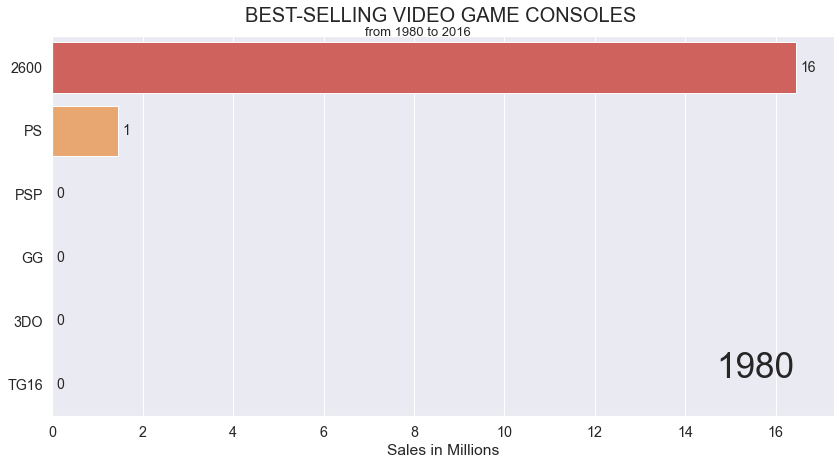

In [15]:
fig, ax = plt.subplots(figsize=(14, 7))
animator = animation.FuncAnimation(fig, bar_chart_race, frames=range(1980,2017), interval=500)
HTML(animator.to_jshtml())

The best platform of all time is the PS2, although the top 10 games are Nintendo's.

  #### _1c. VIDEOGAMES MARKET TREND_

Let's now have a look on how many videogames were sold every year.

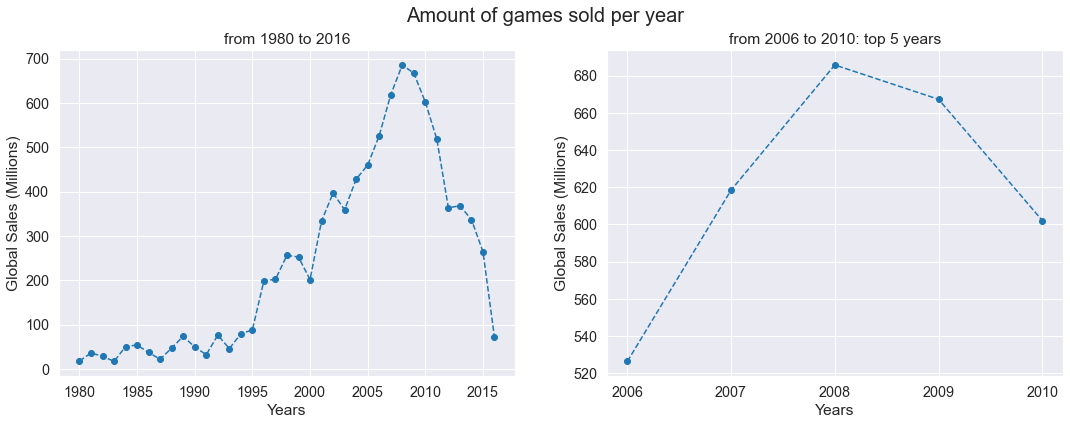

In [16]:
Platform=pd.unique(df.Platform)
Year=np.sort(pd.unique(df.Year))

d=dict()
for platform in Platform:
    sales=[]
    plat=df[df.Platform==platform]
    for year in Year:
        sales.append(plat[plat.Year==year].Global_Sales.sum()) 
    d[platform]=sales

df1=pd.DataFrame(d).set_index(Year)

df3=df.groupby('Year')['Global_Sales'].sum().reset_index()

df3['Platform']=df1.idxmax(axis=1).values

dff=df3.sort_values('Global_Sales', ascending=False)[:5].sort_values('Year')

fig, ax = plt.subplots( 1,2, figsize=(18,6))
ax[1].plot(dff.Year, dff.Global_Sales, marker='o', linestyle='--')
ax[1].set_xticks(dff.Year)
ax[0].plot(df3.Year, df3.Global_Sales, marker='o', linestyle='--')
ax[0].set_ylabel('Global Sales (Millions)')
ax[1].set_ylabel('Global Sales (Millions)')
ax[1].set_xlabel('Years')
ax[0].set_xlabel('Years')
ax[0].set_title('from 1980 to 2016')
ax[1].set_title('from 2006 to 2010: top 5 years')
fig.suptitle('Amount of games sold per year', fontsize=20)
plt.show()

We observe that there was an increase in sales until 2008.

There had been a peak of sales between 2006 and 2010.

Let's see which platform sold the most videogames every year (non cumulative)

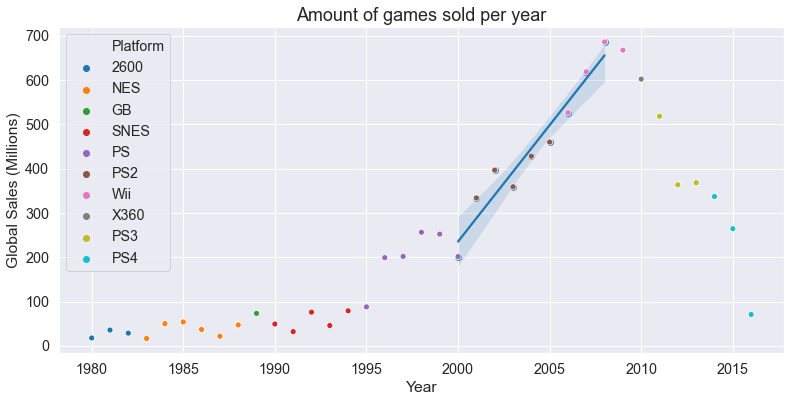

In [17]:
df4=df[np.logical_and(df.Year.values<=2008 , df.Year.values>=2000)].groupby('Year')['Global_Sales'].sum().sort_values(ascending=False).reset_index()

fig, ax = plt.subplots(figsize=(13,6))

sns.regplot(x='Year', y='Global_Sales', data=df4)

g=sns.scatterplot(data=df3, x='Year', y='Global_Sales', hue='Platform')
g.set( ylabel='Global Sales (Millions)')
g.set_title('Amount of games sold per year', size=18)

plt.show()

The PS2 was released in 2000, how did it influence the market? How strong is it?

From 2001 and 2005 the PS2 was the best platform. 

Let's see which are the other **best platforms** in those years:

In [18]:
def pie(year):
    sales=[]
    for platform in Platform:
        plat=df[df.Platform==platform]
        sales.append(plat[plat.Year==year].Global_Sales.sum()) 
        d[plat[plat.Year==year].Global_Sales.sum()]=platform
    
    size_others=sum(sorted(sales)[:-4] )
    values=sorted(sales)[-4:]+[size_others]
    labels=[d[x] for x in sorted(sales)[-4:]]+['others']
    return (values, labels)

dict={'GB':'tab:blue', 'N64':'tab:grey', 'PS2':'tab:orange', 'PS':'tab:purple', 'others':'tab:red', 'GC':'tab:brown',
      'GBA':'tab:pink', 'XB':'tab:green', 'PSP':'tab:olive', 'DS':'tab:cyan'}
      
def color(year):
    colors=[]
    for plat in pie(year)[1]:
        colors.append(dict[plat])
    return colors

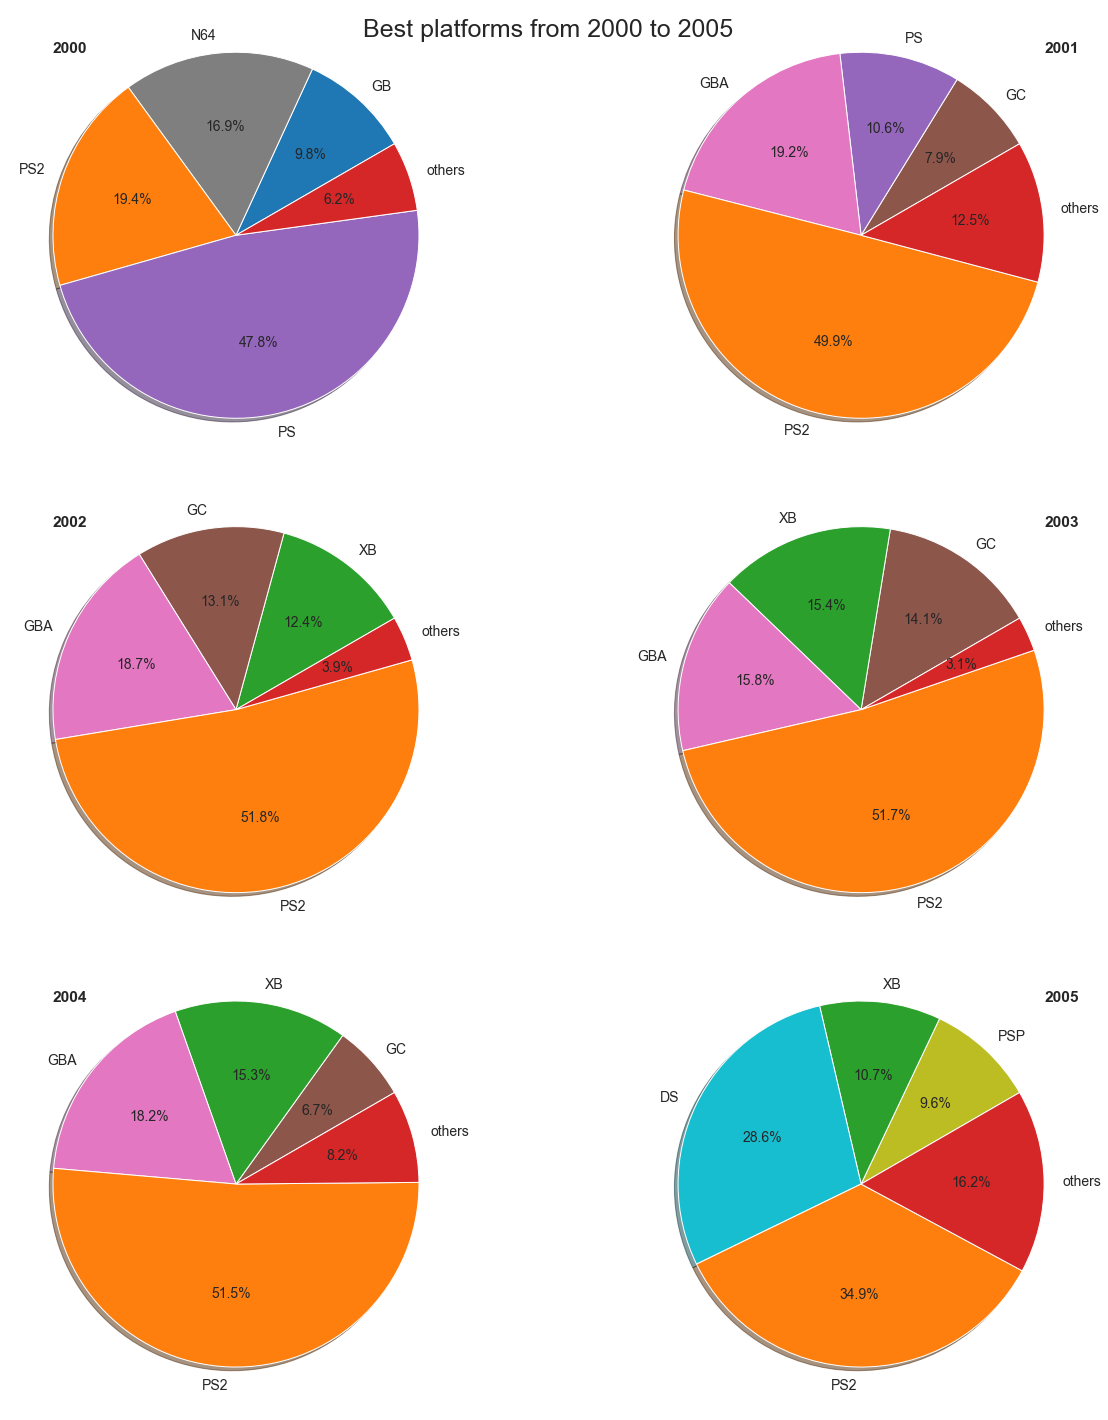

In [19]:
fig, ax = plt.subplots( 3,2, figsize=(20,20))
#add colors

ax[0,0].pie(pie(2000)[0], labels=pie(2000)[1], autopct='%1.1f%%', colors=color(2000), textprops={'fontsize': 14, 'weight':300},shadow=True, startangle=30)
    # Equal aspect ratio ensures that pie is drawn as a circle
ax[0,0].text(-1, 1, '2000', weight=800)
ax[0,1].pie(pie(2001)[0], labels=pie(2001)[1], autopct='%1.1f%%', colors=color(2001), textprops={'fontsize': 14, 'weight':300},shadow=True, startangle=30)
    # Equal aspect ratio ensures that pie is drawn as a circle
ax[0,1].text(1, 1, '2001', weight=800)
ax[1,0].pie(pie(2002)[0], labels=pie(2002)[1], autopct='%1.1f%%', colors=color(2002), textprops={'fontsize': 14, 'weight':300},shadow=True, startangle=30)
    # Equal aspect ratio ensures that pie is drawn as a circle
ax[1,0].text(-1, 1, '2002', weight=800)
ax[1,1].pie(pie(2003)[0], labels=pie(2003)[1], autopct='%1.1f%%', colors=color(2003), textprops={'fontsize': 14, 'weight':300},shadow=True, startangle=30)
    # Equal aspect ratio ensures that pie is drawn as a circle
ax[1,1].text(1, 1, '2003', weight=800)
ax[2,0].pie(pie(2004)[0], labels=pie(2004)[1], autopct='%1.1f%%', colors=color(2004), textprops={'fontsize': 14, 'weight':300},shadow=True, startangle=30)
    # Equal aspect ratio ensures that pie is drawn as a circle
ax[2,0].text(-1, 1, '2004', weight=800)
ax[2,1].pie(pie(2005)[0], labels=pie(2005)[1], autopct='%1.1f%%', colors=color(2005), textprops={'fontsize': 14, 'weight':300},shadow=True, startangle=30)
    # Equal aspect ratio ensures that pie is drawn as a circle
ax[2,1].text(1, 1, '2005', weight=800)
fig.suptitle('Best platforms from 2000 to 2005', fontsize=25)
plt.tight_layout()
plt.show()

Regarding the question "How strong is the PS2?": it dominates the videogame market from 2001 to 2004 (half of the videogames sold are its)

### 2. ANALYSIS OVER GENRE

  #### _2a. WHICH GENRE OF GAME HAVE HIGHEST SALES?_

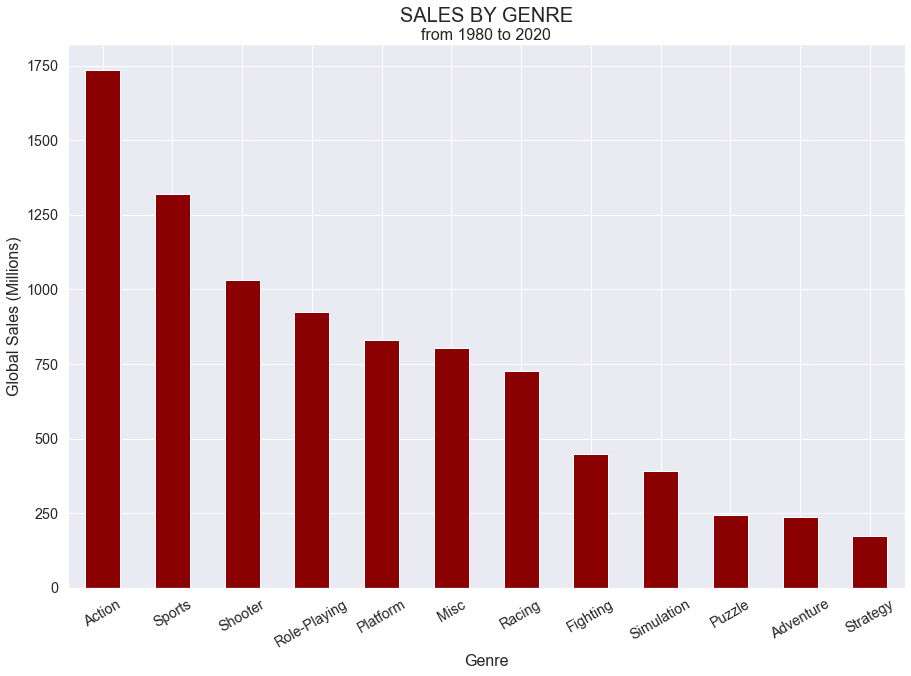

Genre
Action          1735.58
Sports          1319.42
Shooter         1032.62
Role-Playing     923.80
Platform         830.18
Misc             804.94
Racing           727.99
Fighting         447.05
Simulation       389.87
Puzzle           242.22
Adventure        238.49
Strategy         173.43
Name: Global_Sales, dtype: float64

In [20]:
genre_global_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

# Make the plot
f, ax = plt.subplots(figsize=(15,10))
g = genre_global_sales.plot.bar(color = "darkred")
plt.ylabel("Global Sales (Millions)",size=16)
plt.xlabel('Genre',size=16)
plt.title('SALES BY GENRE',size =20)
plt.xticks(rotation=30)

secax = ax.secondary_xaxis('top')
secax.set_xlabel('from 1980 to 2020', size = 16)
secax.set_xticks([])

plt.show()

genre_global_sales

#### _2b. TOP 3 GAMES FOR EACH GENRE_

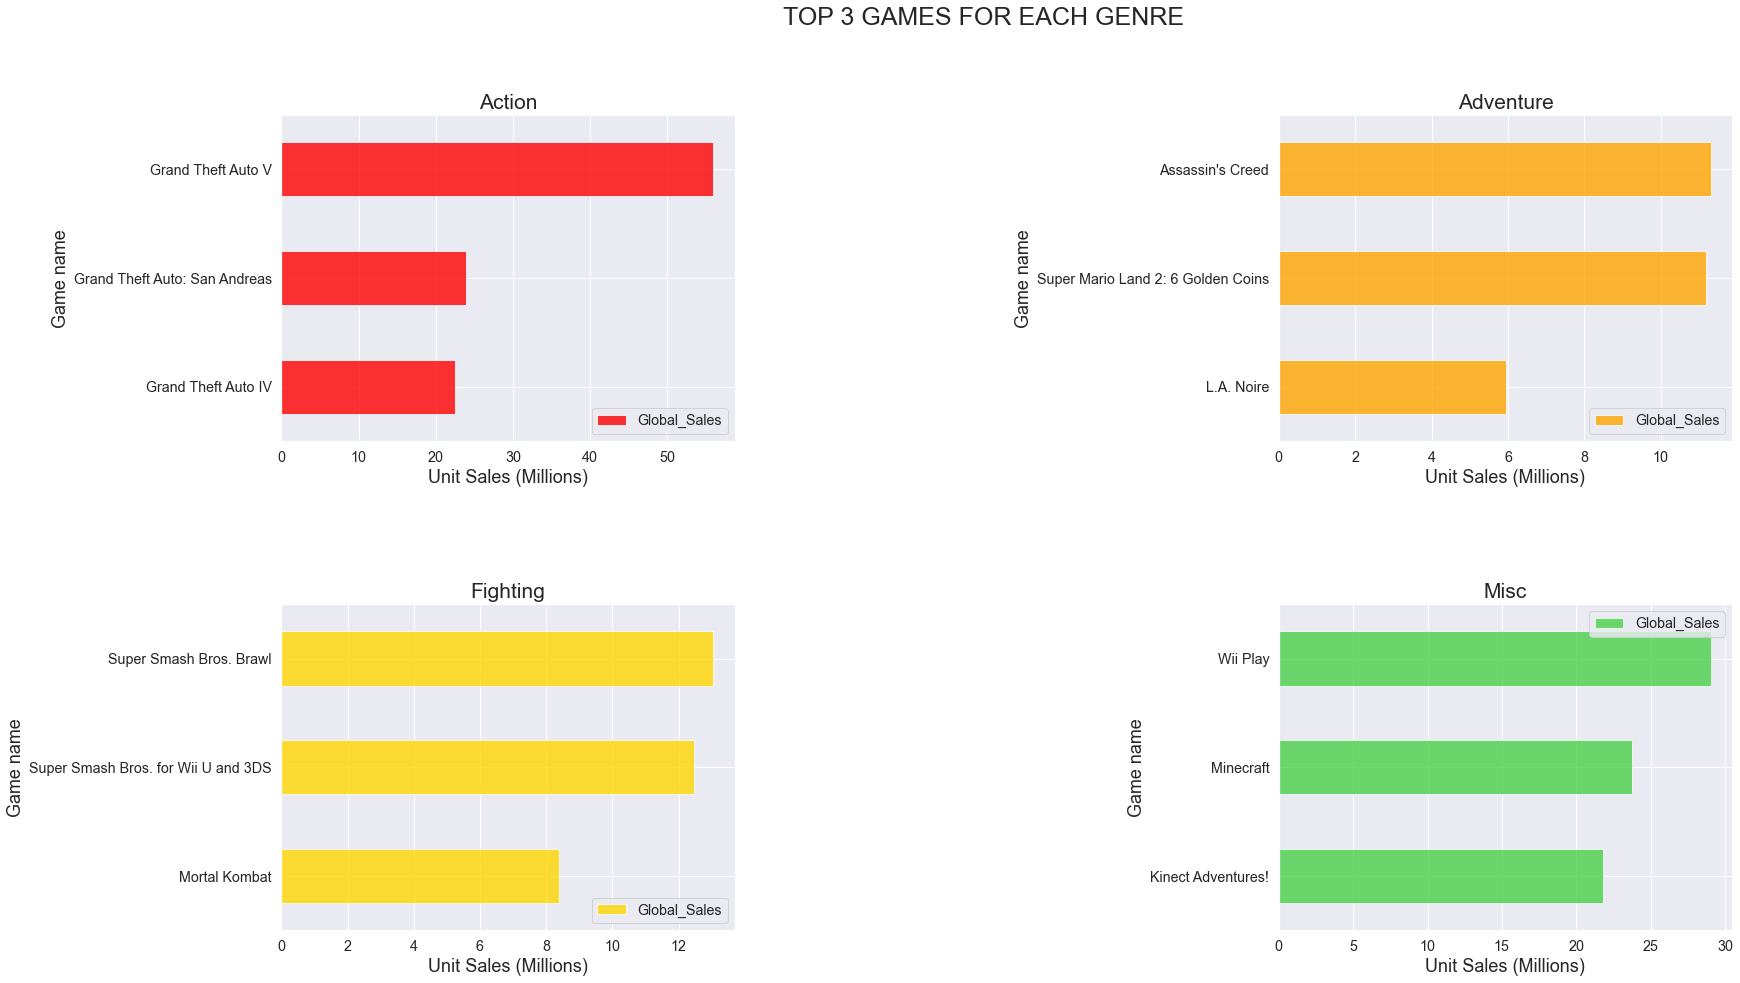

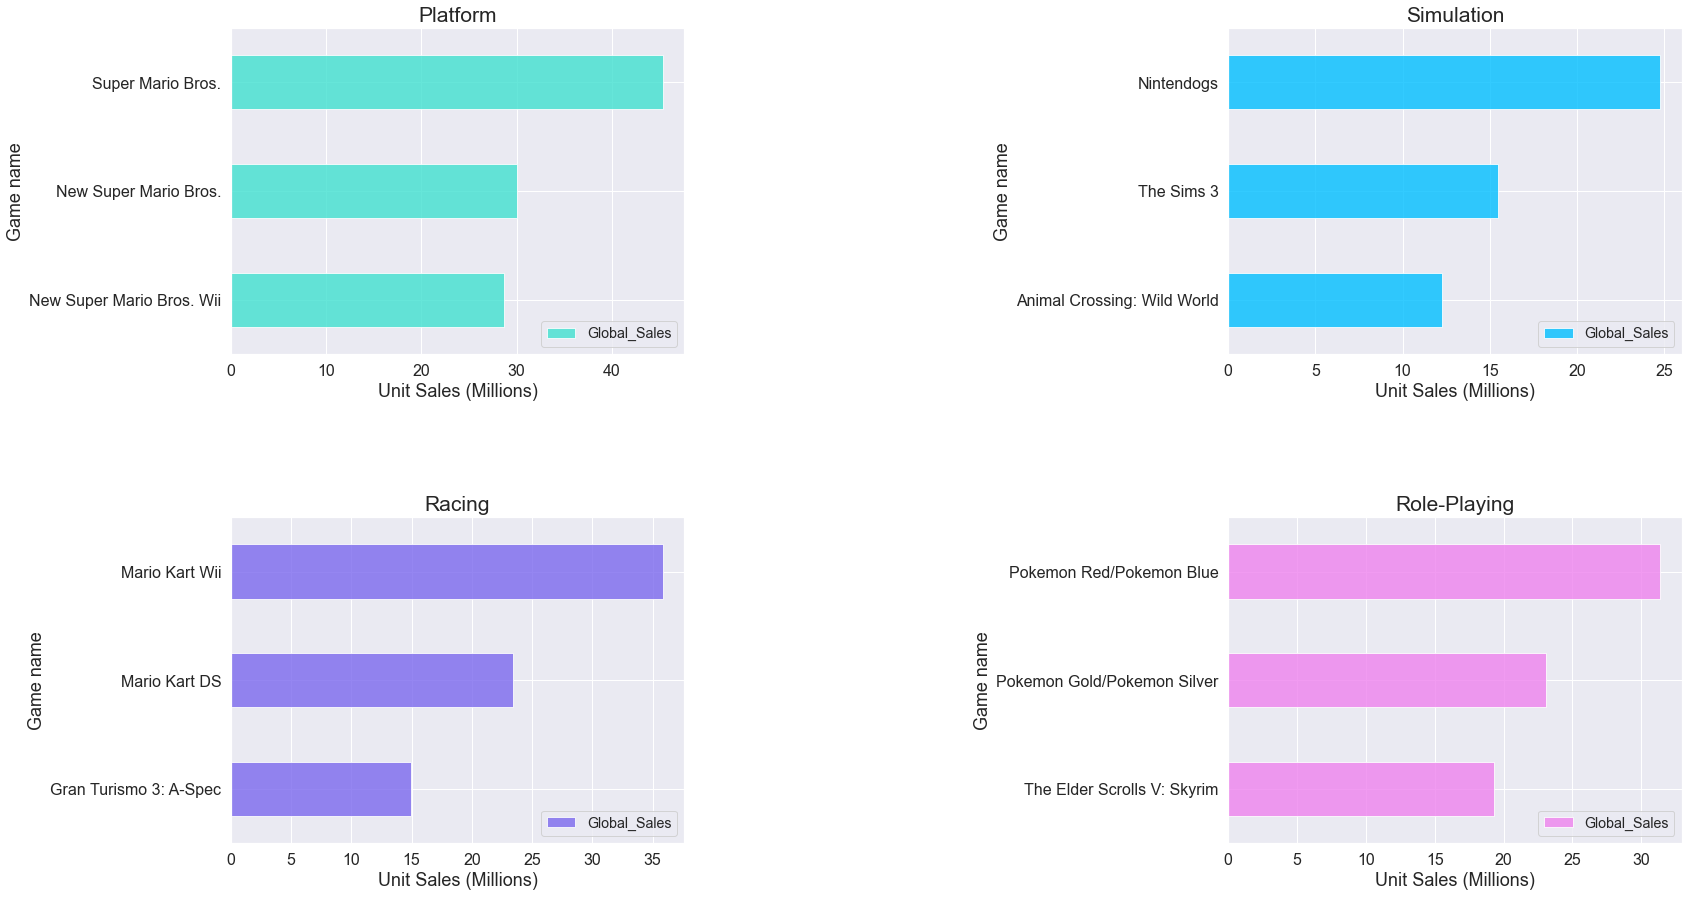

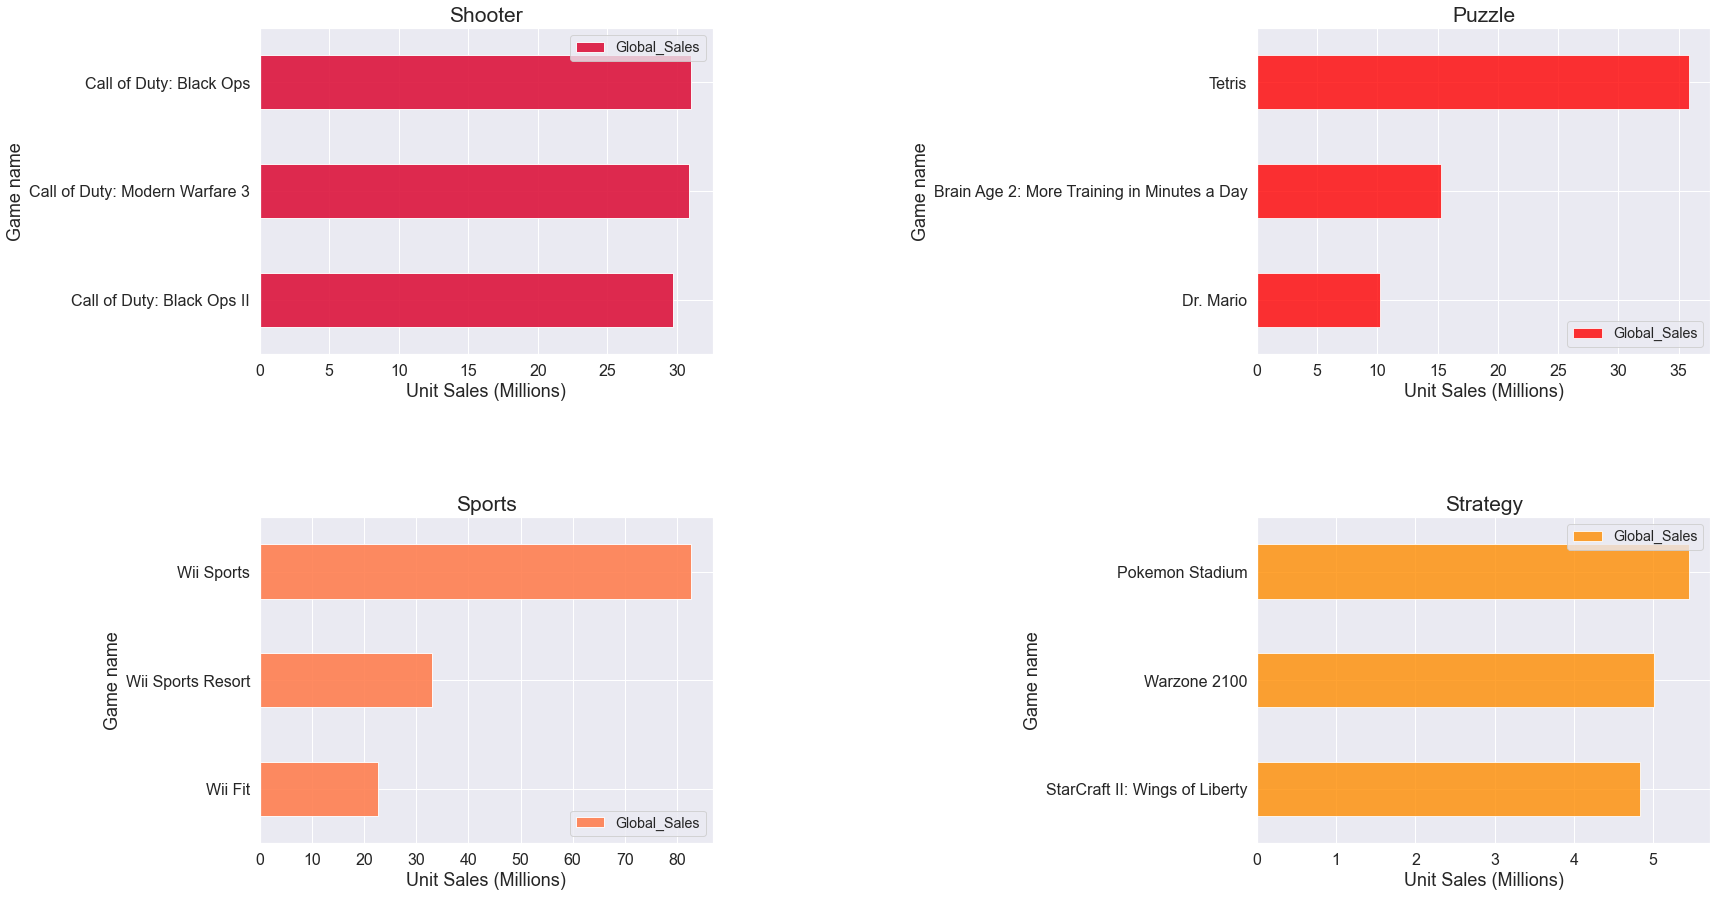

In [21]:
import matplotlib
total_game_per_genre =  pd.DataFrame(df.groupby(['Name','Genre'])['Global_Sales'].sum())
total_game_per_genre = total_game_per_genre.sort_values(['Genre','Global_Sales'],ascending=[True,False])
total_game_per_genre.reset_index(inplace=True)
total_game_per_genre.set_index(total_game_per_genre['Name'],inplace=True)

# Create the DataFrame of the part in interest
action = total_game_per_genre[total_game_per_genre['Genre']=='Action'][:3][::-1]
adventure = total_game_per_genre[total_game_per_genre['Genre']=='Adventure'][:3][::-1]
fighting = total_game_per_genre[total_game_per_genre['Genre']=='Fighting'][:3][::-1]
misc = total_game_per_genre[total_game_per_genre['Genre']=='Misc'][:3][::-1]
platform = total_game_per_genre[total_game_per_genre['Genre']=='Platform'][:3][::-1]
puzzle = total_game_per_genre[total_game_per_genre['Genre']=='Puzzle'][:3][::-1]
racing = total_game_per_genre[total_game_per_genre['Genre']=='Racing'][:3][::-1]
role_playing = total_game_per_genre[total_game_per_genre['Genre']=='Role-Playing'][:3][::-1]
shooter = total_game_per_genre[total_game_per_genre['Genre']=='Shooter'][:3][::-1]
simulation = total_game_per_genre[total_game_per_genre['Genre']=='Simulation'][:3][::-1]
sports = total_game_per_genre[total_game_per_genre['Genre']=='Sports'][:3][::-1]
strategy = total_game_per_genre[total_game_per_genre['Genre']=='Strategy'][:3][::-1]


def get_labels(genre):
    for (axx,g) in zip([ax1,ax2,ax3,ax4],genre):
        _ = plt.rc('xtick', labelsize=16)
        _ = plt.rc('ytick', labelsize=16)
        _ = axx.set_ylabel('Game name', size = 18)
        _ = axx.set_xlabel('Unit Sales (Millions)', size = 18)
        _ = axx.set_title(g, size = 21)
        

def create_plots():
    global fig,ax1,ax2,ax3,ax4
    fig = plt.figure(figsize=(26,15))
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223)
    ax4 = fig.add_subplot(224)
    plt.subplots_adjust(wspace=1.2, hspace=.5)

create_plots()
fig.suptitle('TOP 3 GAMES FOR EACH GENRE', fontsize=25)
_ = action.plot.barh(ax=ax1, color='r', alpha=0.8)
_ = adventure.plot.barh(ax=ax2, color='orange', alpha=0.8)
_ = fighting.plot.barh(ax=ax3, color='gold', alpha=0.8)
_ = misc.plot.barh(ax=ax4, color='limegreen', alpha=0.7)
get_labels(['Action', 'Adventure', 'Fighting', 'Misc'])
plt.subplots_adjust(wspace=1.2, hspace=.5)
plt.show()

create_plots()
_ = platform.plot.barh(ax=ax1, color='turquoise', alpha=0.8)
_ = simulation.plot.barh(ax=ax2, color='deepskyblue', alpha=0.8)
_ = racing.plot.barh(ax=ax3, color='mediumslateblue', alpha=0.8)
_ = role_playing.plot.barh(ax=ax4, color='violet', alpha=0.8)
get_labels(['Platform', 'Simulation', 'Racing', 'Role-Playing'])
plt.subplots_adjust(wspace=1.2, hspace=.5)
plt.show()

create_plots()
_ = shooter.plot.barh(ax=ax1, color='crimson', alpha=0.9)
_ = puzzle.plot.barh(ax=ax2, color='red', alpha=0.8)
_ = sports.plot.barh(ax=ax3, color='coral', alpha=0.9)
_ = strategy.plot.barh(ax=ax4, color='darkorange', alpha=0.8)
get_labels(['Shooter','Puzzle','Sports','Strategy'])
plt.show()

#### _2c. SALES THROUGH COUNTRIES BY GENRE_ 

We would like to see is if there is a correlation between the genre of videogames that the population of a specific country plays in comparison with the culture of the country itself.

We now look at the videogames sales in North America, Japan, and Europe to give a general idea of the game played in each place, and then we analyze the differences in each case.

In [22]:
def set_labels_and_legend():
    plt.legend(genre, loc = "upper left",fontsize = 'large')
    plt.xticks(rotation=50)
    plt.ylabel('Sales (Millions)', size =15)
    plt.xlabel('Years', size =15)

### North America

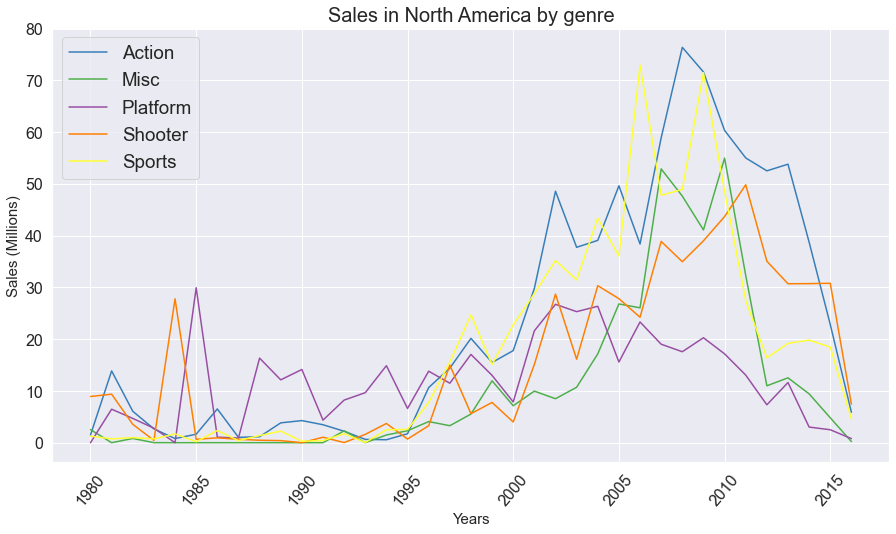

In [23]:
# resumed the data we need
tab_NA = df.groupby(["Genre","Year"])["NA_Sales"].sum().unstack(level=0).fillna(0)

# empty graph and set lines color
ax,fig = plt.subplots(figsize=(15,8))
palette = plt.get_cmap('Set1')

# games whose mean is greater than the global mean
mean_tab_NA = tab_NA.mean().mean()
NA = pd.DataFrame(tab_NA.mean()>mean_tab_NA)
genre = list(NA[NA[0]==True].index)

# create the plot
num=0
for GEN in genre:
    num+=1
    plt.plot(tab_NA[GEN],color=palette(num),label = GEN)

set_labels_and_legend()
plt.title('Sales in North America by genre', size = 20)
plt.show()

In [24]:
# We can make a deeper analysis looking at those three games that are the most wanted:
print("The mean of the USA sales is {} million $.\n".format(round(mean_tab_NA,2)))
NA=pd.DataFrame(tab_NA.mean()>13)

print('The video game genres best sellers are:')
for i,x in enumerate(list(NA[NA[0]==True].index)):
    print("{}.{} ".format(i+1, x), end=" ")
print("\n")

Top_sales_NA = tab_NA[['Action','Shooter']].sum().sum()
print("The global sales of action and shooter genres is {} million $.".format(round(Top_sales_NA)))

The mean of the USA sales is 9.82 million $.

The video game genres best sellers are:
1.Action  2.Shooter  3.Sports  

The global sales of action and shooter genres is 1449.0 million $.


From this plot we can see that in North America the genre best sellers are action, shooter, and sports. 

### Japan

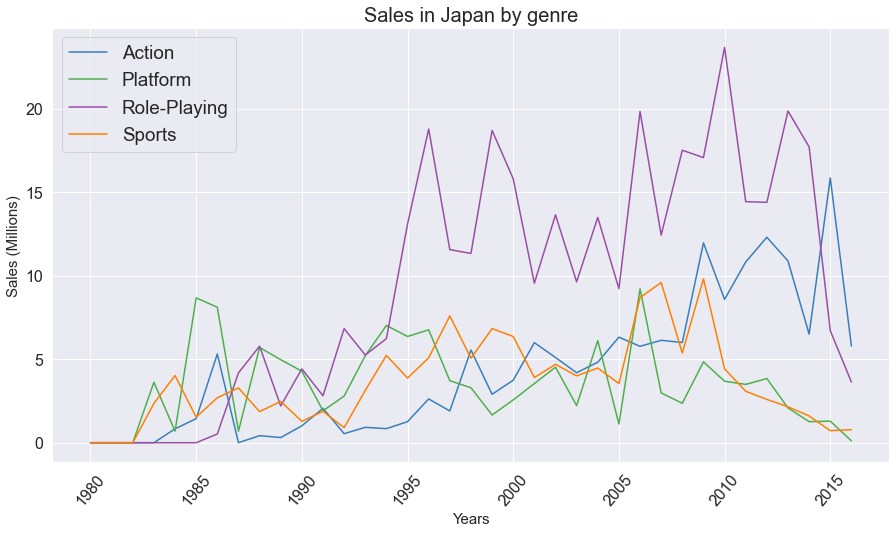

In [25]:
# resumed the data we need
tab_JP = df.groupby(["Genre","Year"])["JP_Sales"].sum().unstack(level=0).fillna(0)

ax,fig = plt.subplots(figsize=(15,8))

# games whose mean is greater than the global mean
mean_tab_JP = tab_JP.mean().mean()
JP = pd.DataFrame(tab_JP.mean()>mean_tab_JP)
genre = list(JP[JP[0]==True].index)

# create the plot
num=0
for GEN in genre:
    num+=1
    plt.plot(tab_JP[GEN],color=palette(num),label = GEN)

set_labels_and_legend()
plt.title('Sales in Japan by genre', size =20)
plt.show()

In [26]:
# We can make a deeper analysis looking at those three games that are the most wanted:
print("The mean of the Japan sales is {} million $. \n".format(round(mean_tab_JP, 2)))
JP=pd.DataFrame(tab_JP.mean()>3.6)

print('The video game genres best sellers are:')
for i,x in enumerate(list(JP[JP[0]==True].index)):
    print("{}.{} ".format(i+1, x), end=" ")
print("\n")

Top_sales_JP = tab_JP[list(JP[JP[0]==True].index)].sum().sum()
print("The global sales of the genres we saw previously is {} million $.".format(round(Top_sales_JP)))

The mean of the Japan sales is 2.89 million $. 

The video game genres best sellers are:
1.Action  2.Role-Playing  3.Sports  

The global sales of the genres we saw previously is 644.0 million $.


In this case, we can observe that the genre of games that are the best-sellers are action, role-playing, and sports. <br> 
We can see that in Japan "strategy games" are loved. <br> 
It is interesting to notice that there is a progressive increase in the sales of action games until 2015, while role-playing is the most played genre from 1990 to 2014.

So, looking at these videogames' sales we can conclude that the interest in shooter games is smaller than the one of Americans.

### Europe

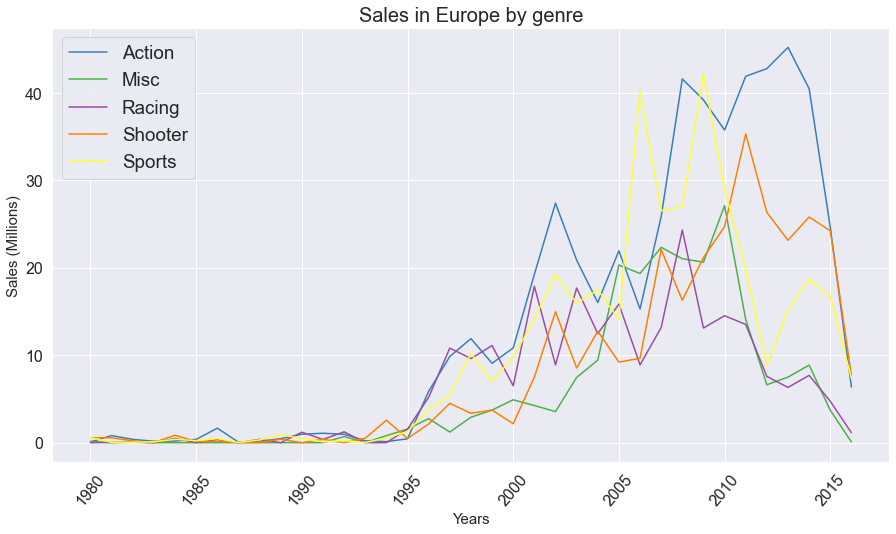

In [27]:
# resumed the data we need
tab_EU = df.groupby(["Genre","Year"])["EU_Sales"].sum().unstack(level=0).fillna(0)

# empty graph and set lines color
ax,fig = plt.subplots(figsize=(15,8))

# games whose mean is greater than the global mean
mean_tab_EU = tab_EU.mean().mean()
EU = pd.DataFrame(tab_EU.mean()>mean_tab_EU)
genre = list(EU[EU[0]==True].index)

# create the plot
num=0
for GEN in genre:
    num+=1
    plt.plot(tab_EU[GEN],color=palette(num),label = GEN)

set_labels_and_legend()
plt.title('Sales in Europe by genre',size = 20)
plt.show()

In [28]:
# We can make a deeper analysis looking at those three games that are the most wanted:
print("The mean of Europe sales is {} million $.\n".format(round(mean_tab_EU, 2)))
EU=pd.DataFrame(tab_EU.mean()>7)

print('The video game genres best sellers are:')
for i,x in enumerate(list(EU[EU[0]==True].index)):
    print("{}.{} ".format(i+1, x), end=" ")
print("\n")

Top_sales_EU = tab_EU[['Action','Shooter']].sum().sum()
print("The global sales of the action and shooter genres is {} million $.".format(round(Top_sales_EU)))

The mean of Europe sales is 5.45 million $.

The video game genres best sellers are:
1.Action  2.Shooter  3.Sports  

The global sales of the action and shooter genres is 833.0 million $.


In Europe, there is a high interest in action, shooter games and sport, as in America. <br> 
It is only since 1995 that there has been a significant increase in video game sales. Like in the USA, action and shooter games are popular, the main difference is that in North America the sales linked to those games are among 1450 million $, while in Europe is almost half.

### 3. ANALYSIS OVER PUBLISHER

#### _3a. GENERAL INFORMATION ABOUT PUBLISHERS_

In [29]:
# Number of games sold by each publisher
publisher=df["Publisher"].value_counts()
print("The total number of publishers is " + str(len(publisher)) + "!")
print()
print("The total number of games for each publisher:")
print(publisher.iloc[:10])

The total number of publishers is 581!

The total number of games for each publisher:
Electronic Arts                 1345
Activision                       969
Namco Bandai Games               928
Ubisoft                          917
Konami Digital Entertainment     824
THQ                              714
Nintendo                         697
Sony Computer Entertainment      683
Sega                             630
Take-Two Interactive             412
Name: Publisher, dtype: int64


The total number of sales of top 11 publishers

Publisher
Nintendo                        1785.46
Electronic Arts                 1108.78
Activision                       726.51
Sony Computer Entertainment      608.21
Ubisoft                          473.25
Take-Two Interactive             399.30
THQ                              341.61
Konami Digital Entertainment     280.95
Sega                             270.66
Namco Bandai Games               253.65
Microsoft Game Studios           245.79
Name: Global_Sales, dtype: float64


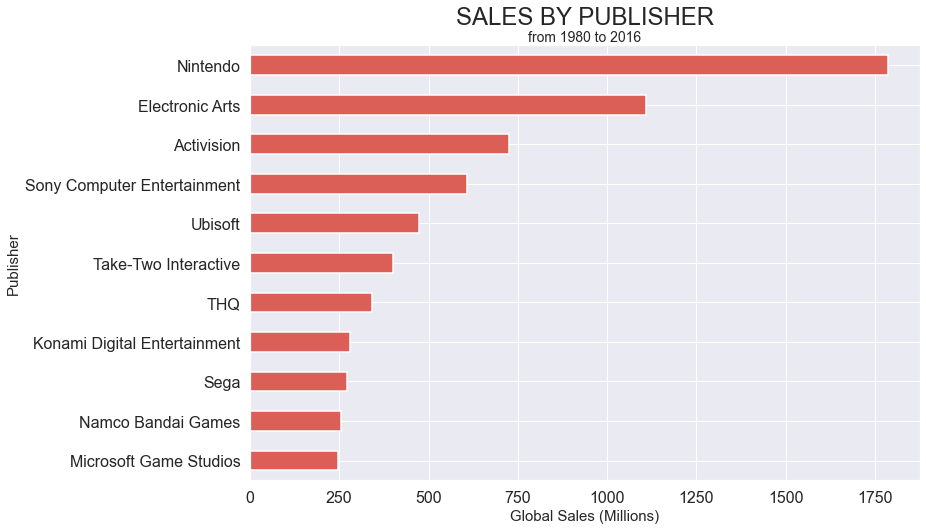

In [30]:
# Number of sales
global_sales_pub = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)
top_11_publishers = global_sales_pub[:11][::-1]
print("The total number of sales of top 11 publishers")
print()
print(global_sales_pub[:11])

f, ax = plt.subplots(figsize=(12,8))

# Set the colors
sns.set_palette("hls")
sns.set_context("talk")

# Plot
g = top_11_publishers.plot.barh()
plt.xlabel("Global Sales (Millions)",size=15)
plt.ylabel("Publisher",size=15)
plt.title("SALES BY PUBLISHER",size =24)
plt.xticks()

secax = ax.secondary_xaxis("top")
secax.set_xlabel("from 1980 to 2016",size =14)
secax.set_xticks([])

plt.show()

#### _3b. RELATION PUBLISHERS-PLACES_

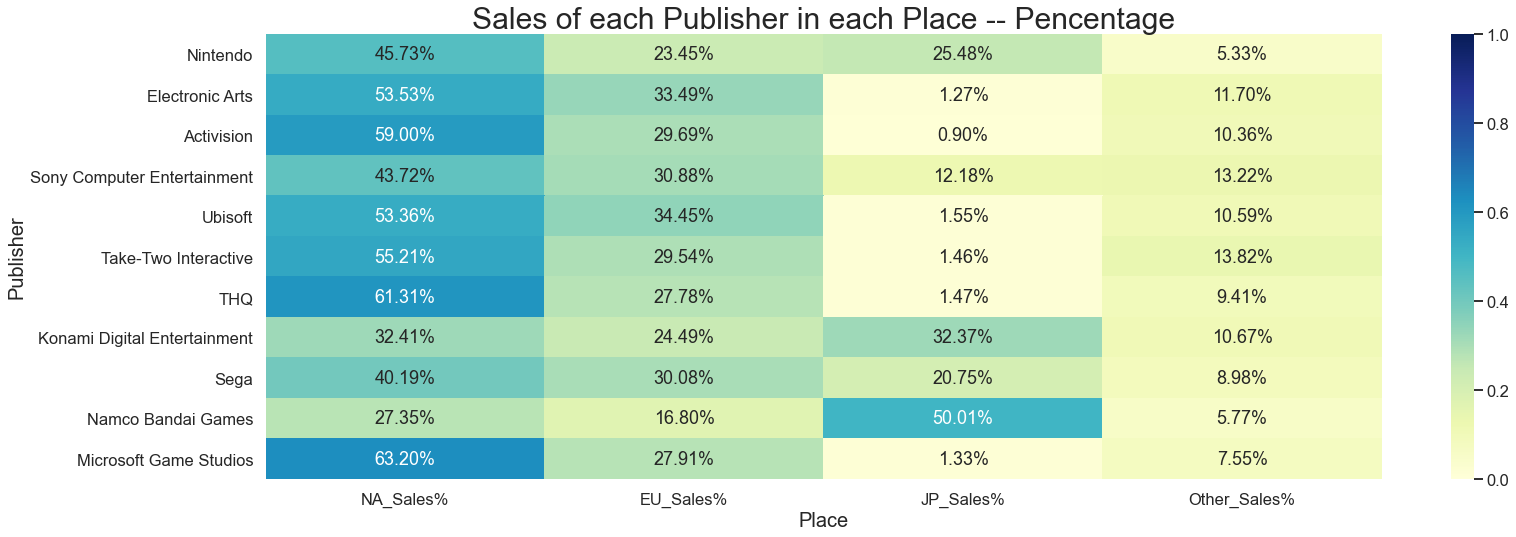

In [31]:
Pubcountrytot = df.groupby(['Publisher']).sum().iloc[:,2:]
Pubcountrysort = Pubcountrytot.sort_values("Global_Sales",ascending=False)
Pubcountrynew = pd.DataFrame(Pubcountrysort[:11])

# Adding new columns of percentage
Pubcountrynew["NA_Sales%"] = Pubcountrynew.iloc[:,0]/Pubcountrynew.iloc[:,4]
Pubcountrynew["EU_Sales%"] = Pubcountrynew.iloc[:,1]/Pubcountrynew.iloc[:,4]
Pubcountrynew["JP_Sales%"] = Pubcountrynew.iloc[:,2]/Pubcountrynew.iloc[:,4]
Pubcountrynew["Other_Sales%"] = Pubcountrynew.iloc[:,3]/Pubcountrynew.iloc[:,4]

# Plot map way
plt.figure(figsize=(25, 18))
plt.subplot(211)
sns.heatmap(Pubcountrynew.loc[:,"NA_Sales%":"Other_Sales%"], cmap="YlGnBu",vmax=1, vmin=0, annot=True, fmt = ".2%")
plt.xlabel("Place",size=20)
plt.ylabel("Publisher", size=20)
plt.title("Sales of each Publisher in each Place -- Pencentage",size=30)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.show()

Activision, Take-Two Interactive, THQ, and Microsoft Game Studios have a percentage of sales in America above 55% (dark blue) and a percentage of sales in Japan under 1.5% (light yellow).
<br>
On the other hand, Nintendo, Sony, Sega, Konami, and Namco Bandai Games have a more balanced sales distribution. 

In [32]:
# Research of the nationality of each publisher
Nation_pub=["JAPAN","USA","USA","JAPAN","FRANCE","USA","USA","JAPAN","JAPAN","JAPAN","USA"]
Pubcountrynew["Nationality_Publisher"] = Nation_pub
Pubcountrynew=Pubcountrynew[Pubcountrynew["Nationality_Publisher"] != "FRANCE"]
Pubcountrynew["NA_Sales%"] = round(Pubcountrynew["NA_Sales%"] * 100,2)
Pubcountrynew["EU_Sales%"] = round(Pubcountrynew["EU_Sales%"] * 100,2)
Pubcountrynew["JP_Sales%"] = round(Pubcountrynew["JP_Sales%"] * 100,2)
Pubcountrynew["Other_Sales%"] = round(Pubcountrynew["Other_Sales%"] * 100,2)
Pubcountrynew.head(10)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_Sales%,EU_Sales%,JP_Sales%,Other_Sales%,Nationality_Publisher
Publisher,,,,,,,,,,
Nintendo,816.43,418.61,454.99,95.23,1785.46,45.73,23.45,25.48,5.33,JAPAN
Electronic Arts,593.51,371.36,14.03,129.73,1108.78,53.53,33.49,1.27,11.70,USA
Activision,428.65,215.69,6.54,75.28,726.51,59.00,29.69,0.90,10.36,USA
Sony Computer Entertainment,265.89,187.80,74.10,80.42,608.21,43.72,30.88,12.18,13.22,JAPAN
Take-Two Interactive,220.47,117.95,5.83,55.20,399.30,55.21,29.54,1.46,13.82,USA
THQ,209.44,94.91,5.01,32.13,341.61,61.31,27.78,1.47,9.41,USA
Konami Digital Entertainment,91.06,68.80,90.93,29.98,280.95,32.41,24.49,32.37,10.67,JAPAN
Sega,108.78,81.41,56.15,24.30,270.66,40.19,30.08,20.75,8.98,JAPAN
Namco Bandai Games,69.38,42.61,126.84,14.64,253.65,27.35,16.80,50.01,5.77,JAPAN


The top 11 publishers are from Japan or USA (there is only one exception). 
<br>
So, for our study, we only take into account the five best USA publishers and the five best Japan publishers, removing Ubisoft which is French.

In [33]:
Pubcountrynew1 = Pubcountrynew.groupby("Nationality_Publisher")[["NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]].sum()
Pubcountrynew1["NA_Sales%"] = round(Pubcountrynew1.iloc[:,0]/Pubcountrynew1.iloc[:,4] * 100, 2)
Pubcountrynew1["EU_Sales%"] = round(Pubcountrynew1.iloc[:,1]/Pubcountrynew1.iloc[:,4] * 100, 2)
Pubcountrynew1["JP_Sales%"] = round(Pubcountrynew1.iloc[:,2]/Pubcountrynew1.iloc[:,4] * 100, 2)
Pubcountrynew1["Other_Sales%"] = round(Pubcountrynew1.iloc[:,3]/Pubcountrynew1.iloc[:,4] * 100,2)
Pubcountrynew2 = pd.DataFrame(Pubcountrynew1.iloc[:,:4])
Pubcountrynew2.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Nationality_Publisher,,,,
JAPAN,1351.54,799.23,803.01,244.57
USA,1607.42,868.52,34.67,310.90


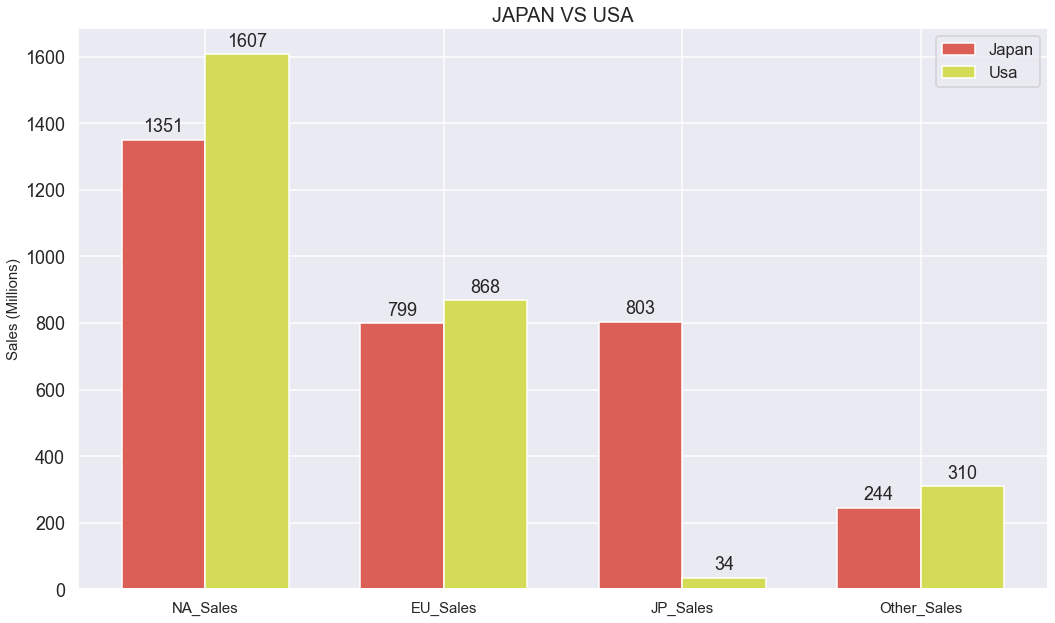

,NA_Sales%,EU_Sales%,JP_Sales%,Other_Sales%
Nationality_Publisher,,,,
JAPAN,42.25,24.98,25.10,7.65
USA,56.96,30.78,1.23,11.02


In [34]:
# Comparison graph between Japan and Usa
labels = ["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]
J_Sales = list(Pubcountrynew2.iloc[0,:])
J_Sales = [int(i) for i in J_Sales]
U_Sales = list(Pubcountrynew2.iloc[1,:])
U_Sales = [int(i) for i in U_Sales]

x = np.arange(len(labels))  
width = 0.35 
fig, ax = plt.subplots(figsize=(15,9))
ax1 = ax.bar(x - width/2,J_Sales, width, label="Japan")
ax2 = ax.bar(x + width/2, U_Sales, width, label="Usa")

ax.set_ylabel("Sales (Millions)",size=15)
ax.set_title("JAPAN VS USA",size=20)
ax.set_xticks(x)
ax.set_xticklabels(labels,size=15)
ax.legend()

def particularlabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 4),  
                    textcoords="offset points",
                    ha='center', va='bottom')

particularlabel(ax1)
particularlabel(ax2)

fig.tight_layout()

plt.show()

Pubcountrynew3 = pd.DataFrame(Pubcountrynew1.iloc[:,5:])
Pubcountrynew3.head()

We studied a sort of "battle" between Japan and the USA, the states from which the main videogame publishers come.<br>

From the bar plot, we can see how the American publishers have sold mainly in America, with very little success in Japan.<br>
57% of their sales are in NA<br>
1% of their sales are in JP<br>

This is a clear confirmation that Electronic Arts and Activision which favor Action and Shooter games are being sold in North America.
<br>
On the other hand, videogames from Japanese publishers are purchesed all over the world.<br>
42% of their sales are in NA<br>
25% of their sales are in JP<br>

In particular, Sony and Nintendo had great success in America with their Misc, Platform and Sports video games.
<br>
<br>


**To sum up**, the main information that we have extrapolated from the dataset are: 
- the PS2 is the most successful console and it has dominated the videogames market from 2001 to 2005
- action games are the most sold and Americans are the ones who buy more videogames
- The videogames purchased in Japan come from Japan's publishers predominantly

Authors:   *Matteo Pozzan, Filippo Santin, Francesca Zen.*